In [1]:
import os

path = '../data/dogs-vs-cats/train/'
os.listdir(path)

['cat.5620.jpg',
 'dog.12450.jpg',
 'cat.11882.jpg',
 'dog.4109.jpg',
 'cat.5341.jpg',
 'cat.6406.jpg',
 'cat.9518.jpg',
 'dog.11562.jpg',
 'cat.11696.jpg',
 'cat.3525.jpg',
 'dog.6152.jpg',
 'dog.2956.jpg',
 'cat.4883.jpg',
 'cat.5723.jpg',
 'cat.7124.jpg',
 'cat.3821.jpg',
 'dog.12218.jpg',
 'cat.6873.jpg',
 'cat.3543.jpg',
 'dog.2318.jpg',
 'dog.3823.jpg',
 'dog.3655.jpg',
 'dog.8925.jpg',
 'dog.8426.jpg',
 'dog.10524.jpg',
 'dog.2767.jpg',
 'dog.9004.jpg',
 'dog.4573.jpg',
 'dog.1062.jpg',
 'dog.7733.jpg',
 'cat.1698.jpg',
 'cat.12210.jpg',
 'cat.4648.jpg',
 'dog.7596.jpg',
 'cat.3883.jpg',
 'cat.10590.jpg',
 'dog.5204.jpg',
 'cat.24.jpg',
 'cat.3022.jpg',
 'cat.113.jpg',
 'dog.10083.jpg',
 'dog.5616.jpg',
 'dog.564.jpg',
 'cat.4735.jpg',
 'cat.510.jpg',
 'cat.1379.jpg',
 'dog.11572.jpg',
 'cat.8963.jpg',
 'cat.7140.jpg',
 'dog.8483.jpg',
 'cat.10512.jpg',
 'cat.3628.jpg',
 'cat.10678.jpg',
 'cat.12321.jpg',
 'dog.10500.jpg',
 'cat.9928.jpg',
 'cat.1124.jpg',
 'dog.10971.jpg',
 'do

In [2]:
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

In [3]:
# print(path + sample)

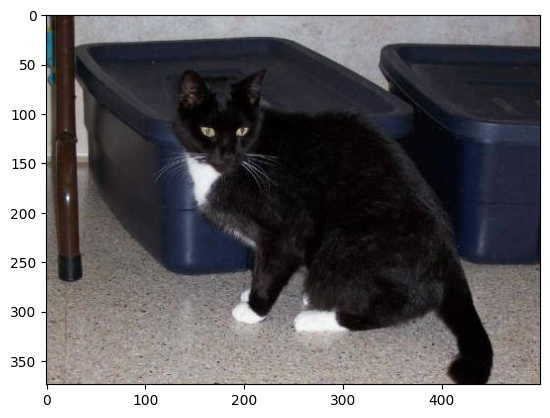

In [4]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [5]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image.shape

(320, 499, 3)

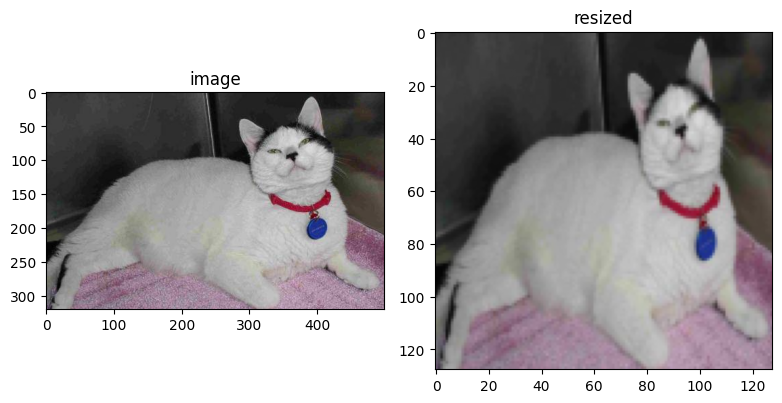

In [6]:
from skimage.transform import resize
resize_img = resize(image, (128,128,3))

fig, axes = plt.subplots(1, 2, figsize=(8,4))
ax = axes.ravel()


ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resize_img, cmap=plt.cm.gray)
ax[1].set_title("resized")

fig.tight_layout()
plt.show()

In [7]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray 
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
    # print(file)
    image = mpimg.imread(path + file)
    # print(image, type(image)))
    images.append(resize(image, (32,32,3)))

images = np.array(images)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [8]:
images.shape, labels[:3]

((25000, 32, 32, 3), ['cat', 'dog', 'cat'])

In [9]:
images[:3]

array([[[[0.06900267, 0.10476673, 0.06370135],
         [0.06818666, 0.10982095, 0.07297101],
         [0.11759957, 0.14636542, 0.09527135],
         ...,
         [0.59318711, 0.63774054, 0.64624223],
         [0.74301777, 0.77006988, 0.76643614],
         [0.95056935, 0.95673981, 0.94958123]],

        [[0.06636849, 0.10632607, 0.06081193],
         [0.06480638, 0.10936797, 0.06663809],
         [0.08161055, 0.12320114, 0.08109576],
         ...,
         [0.44259232, 0.52747207, 0.54281928],
         [0.50078661, 0.57036705, 0.58104253],
         [0.87835225, 0.89165566, 0.88933715]],

        [[0.14613809, 0.1644985 , 0.08949462],
         [0.08540569, 0.11776779, 0.06686138],
         [0.11888159, 0.14692066, 0.08808303],
         ...,
         [0.57553229, 0.64435934, 0.66130422],
         [0.60023005, 0.66684157, 0.68011573],
         [0.92152253, 0.93490337, 0.93527845]],

        ...,

        [[0.42210293, 0.20275644, 0.13374691],
         [0.41489031, 0.21185878, 0.14258518]

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([0, 1, 0]), array(['cat', 'dog'], dtype='<U3'))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=13, stratify=labels_encoded)
X_train.shape, X_test.shape

((20000, 32, 32, 3), (5000, 32, 32, 3))

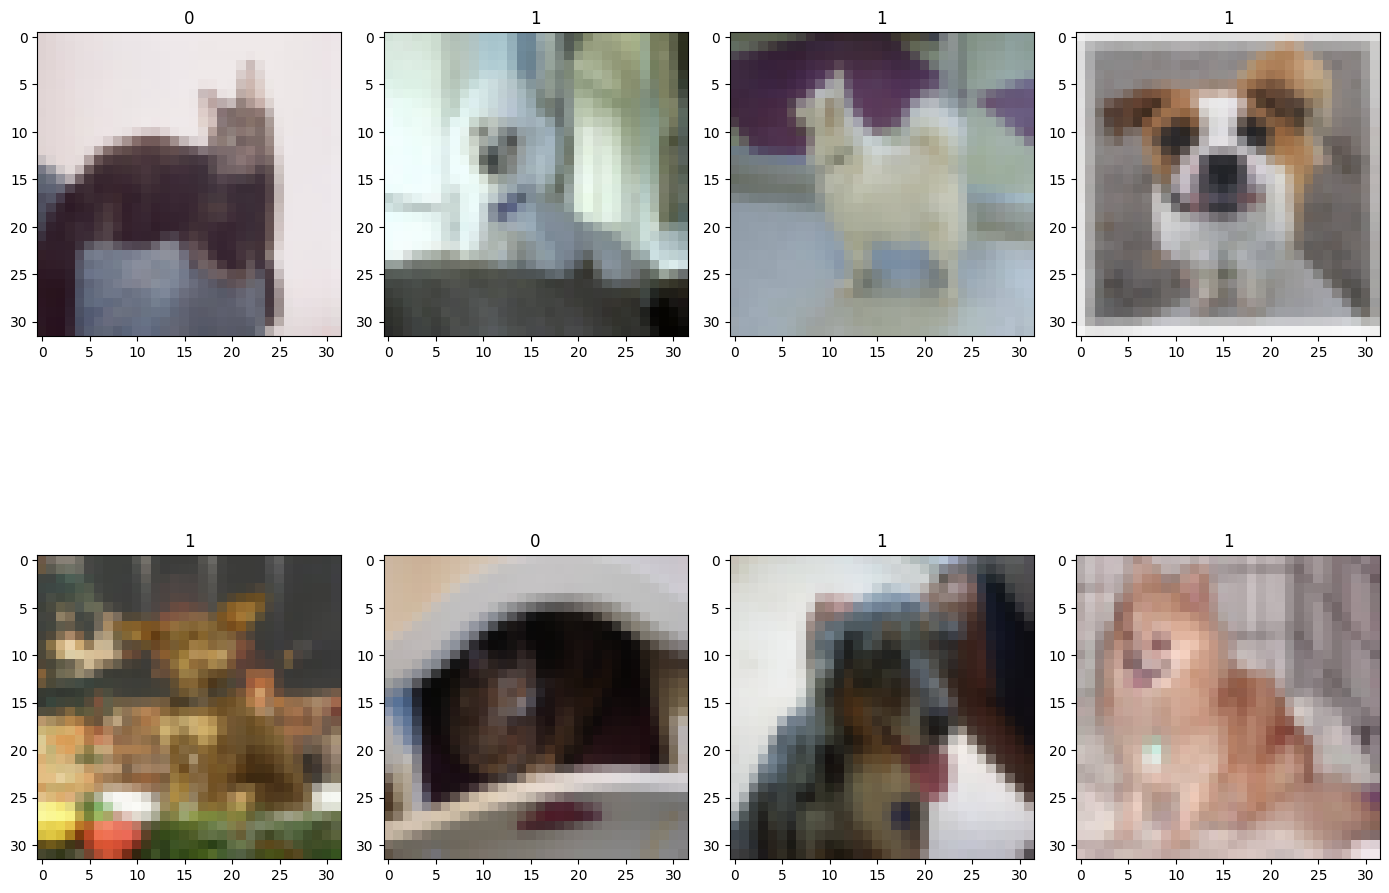

In [12]:
samples = random.choices(population=range(0, 20000), k=8)

plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])

plt.tight_layout()
plt.show()

In [13]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

2024-11-07 11:35:08.256850: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-07 11:35:08.296719: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-07 11:35:08.296758: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-07 11:35:08.298191: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-07 11:35:08.305502: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
import time 

start_time = time.time()
hist = model.fit(X_train.reshape(20000, 32, 32, 3), y_train, epochs=10, verbose=1, validation_data=(X_test.reshape(5000, 32, 32, 3), y_test))
print('fit time : ', time.time() - start_time)

Epoch 1/10


2024-11-07 11:39:57.557876: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-11-07 11:39:57.756788: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-11-07 11:39:59.206563: I external/local_xla/xla/service/service.cc:168] XLA service 0x7aa9ae0ad130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-07 11:39:59.206643: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-11-07 11:39:59.218777: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730947199.377670   95994 device_compiler.h:186] Compiled clust

625/625 [==============================] - 14s 15ms/step - loss: 0.6601 - accuracy: 0.5967 - val_loss: 0.5954 - val_accuracy: 0.6838
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.5874 - accuracy: 0.6866 - val_loss: 0.5463 - val_accuracy: 0.7270
Epoch 3/10
625/625 [==============================] - 9s 14ms/step - loss: 0.5491 - accuracy: 0.7204 - val_loss: 0.5162 - val_accuracy: 0.7398
Epoch 4/10
625/625 [==============================] - 8s 13ms/step - loss: 0.5228 - accuracy: 0.7384 - val_loss: 0.4968 - val_accuracy: 0.7544
Epoch 5/10
625/625 [==============================] - 9s 15ms/step - loss: 0.5014 - accuracy: 0.7546 - val_loss: 0.4849 - val_accuracy: 0.7690
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 0.4804 - accuracy: 0.7678 - val_loss: 0.5049 - val_accuracy: 0.7486
Epoch 7/10
625/625 [==============================] - 8s 14ms/step - loss: 0.4706 - accuracy: 0.7736 - val_loss: 0.4700 - val_accuracy: 0.7742
Epoch 8/10

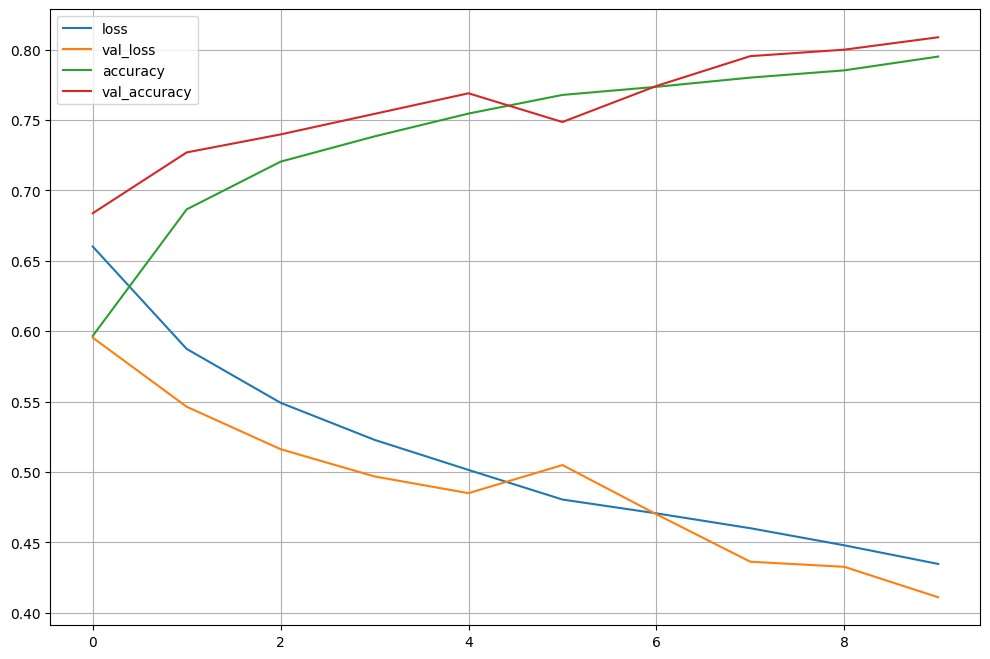

In [19]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [25]:
import os
import shutil 

path = '../data/dogs-vs-cats/train/'
classes = ['cat', 'dog']

for class_name in classes:
    class_path = os.path.join(path, class_name)
    os.makedirs(class_name, exist_ok=True)
    for file in full_names:
        if class_name in file:
            shutil.move(os.path.join(path,file), os.path.join(class_path, file))

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

In [28]:
batch_size = 32

train_generator = datagen.flow_from_directory(
    path,
    target_size=(128,128),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 20000 images belonging to 2 classes.


In [29]:
validation_generator = datagen.flow_from_directory(
    path,
    target_size=(128,128),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 5000 images belonging to 2 classes.


In [30]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax')
])

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples
)

Epoch 1/5


2024-11-07 12:00:04.535543: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


  624/20000 [..............................] - ETA: 13:15 - loss: 0.6651 - accuracy: 0.6045WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 100000 batches). You may need to use the repeat() function when building your dataset.


2024-11-07 12:00:33.504837: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1059589087979889780


20000/20000 [==============================] - 38s 2ms/step - loss: 0.6648 - accuracy: 0.6048 - val_loss: 0.5654 - val_accuracy: 0.6980


2024-11-07 12:00:41.894387: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15369102714986773803
2024-11-07 12:00:41.894474: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13869756386494078657
